## loading Reuters dataset

In [3]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 3s 1us/step


In [5]:
print(len(test_data))
print(train_data[10])


2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


## Decoding newswires back to text

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in  train_data[0]])
print(decoded_newswire)

550378/550378 [==============================] - 1s 2us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))#creates an  all zeros of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. #sets specific indices of results[i] to 1s
    return results

# encoding the input data 
x_train = vectorize_sequences(train_data) #vectorized training data
x_test = vectorize_sequences(test_data) #vectorized test data

def to_one_hot(labels, dimensions=46):
    results = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

y_train = to_one_hot(train_labels) #vectorized training data
y_test = to_one_hot(test_labels) #vectorized test data

#youcan to do this in keras 
#from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(train_labels)
#x_train = to_categorical(test_labels)

from tensorflow import keras
from tensorflow.keras import layers

#model definition
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

#compiling the model
model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics="accuracy")

#setting aside validating data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 34ms/step - loss: 2.5082 - accuracy: 0.5631 - val_loss: 1.6407 - val_accuracy: 0.6590
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.3267 - accuracy: 0.7219 - val_loss: 1.2700 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 0.9977 - accuracy: 0.7927 - val_loss: 1.1157 - val_accuracy: 0.7630
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8011 - accuracy: 0.8275 - val_loss: 1.0145 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6493 - accuracy: 0.8576 - val_loss: 0.9640 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5226 - accuracy: 0.8881 - val_loss: 0.9272 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4187 - accuracy: 0.9109 - val_loss: 0.9052 - val_accuracy: 0.8110
Epoch 8/20
16

<function matplotlib.pyplot.show(close=None, block=None)>

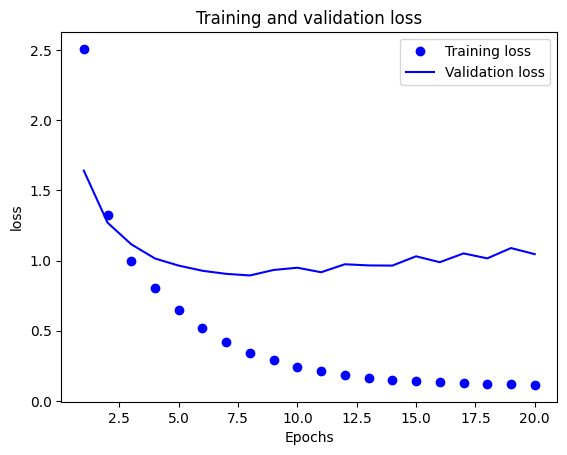

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show

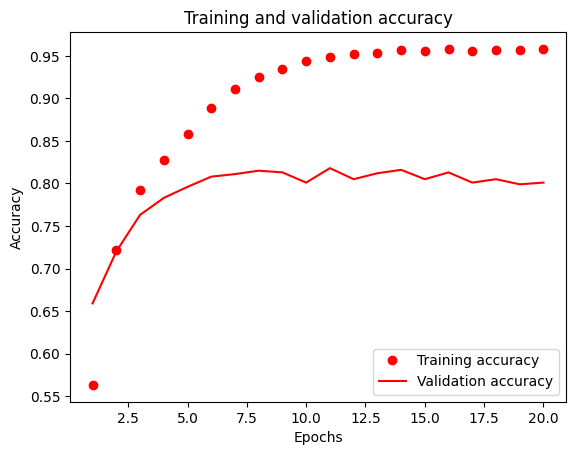

In [15]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()